In [8]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from pylab import rcParams
import sklearn as sk

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [13]:
address = 'titanic-training-data.csv'
titanic_training = pd.read_csv(address)

In [14]:
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check that target variable is binary

<AxesSubplot:xlabel='Survived', ylabel='count'>

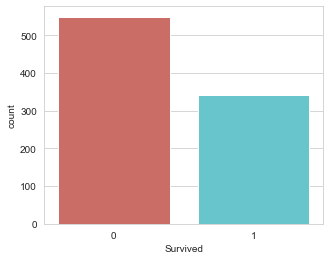

In [18]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

# Check for missing values

In [20]:
titanic_training[titanic_training.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Taking care of missing values

## Drop irrelevant columns

In [26]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Impute age values

<AxesSubplot:xlabel='Parch', ylabel='Age'>

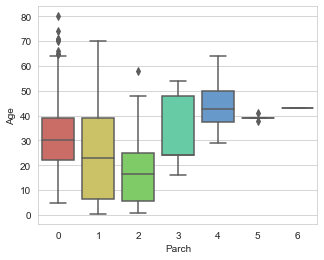

In [27]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

In [30]:
parch_groups = titanic_data.groupby('Parch')
parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [33]:
parch_to_age = parch_groups.mean().Age

def age_approx(cols): #approximate a person's age based on the Parch column
    age, parch = cols[:2]
    if pd.isnull(age):
        if parch in (0,1,2,3,4):
            return round(parch_to_age[parch])
        return round(parch_to_age.mean())
    return round(age)

33.38820209196923

In [34]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)

In [36]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

## Drop the null 'Embarked' rows

In [40]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.837087,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.098453,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,31.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Convert categoricals into dummy variables

In [45]:
pd.get_dummies(titanic_data, columns=['Parch'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,male,22.0,1,7.2500,S,1,0,0,0,0,0,0
1,2,1,1,female,38.0,1,71.2833,C,1,0,0,0,0,0,0
2,3,1,3,female,26.0,0,7.9250,S,1,0,0,0,0,0,0
3,4,1,1,female,35.0,1,53.1000,S,1,0,0,0,0,0,0
4,5,0,3,male,35.0,0,8.0500,S,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,male,27.0,0,13.0000,S,1,0,0,0,0,0,0
885,888,1,1,female,19.0,0,30.0000,S,1,0,0,0,0,0,0
886,889,0,3,female,17.0,1,23.4500,S,0,0,1,0,0,0,0
887,890,1,1,male,26.0,0,30.0000,C,1,0,0,0,0,0,0


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[:5]

array([1, 0, 0, 0, 1])

In [53]:
titanic_data.head()
# 1 = male, 0 = female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [56]:
gender_df = pd.DataFrame(gender_encoded, columns=['male'])
gender_df.head()

,male
0,1
1,0
2,0
3,0
4,1


# Get dummies for 'Embarked' column

In [59]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [67]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_onehot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_onehotmat = embarked_onehot.toarray()
embarked_df = pd.DataFrame(embarked_onehotmat, columns=['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [70]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [74]:
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df], axis=1, verify_integrity=True).astype(float)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


# Find correlation between columns

<AxesSubplot:>

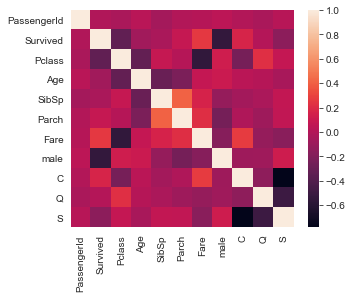

In [75]:
sb.heatmap(titanic_dmy.corr())

In [78]:
titanic_dmy.drop(['Fare', 'Pclass'], axis=1, inplace=True)

# Break data into training and test

In [87]:
x_train, x_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                   titanic_dmy['Survived'], test_size=0.2,
                                                   random_state=200)

In [88]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 8), (178, 8), (711,), (178,))

# Fit the model

In [89]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [90]:
y_pred = log_reg.predict(x_test)

# Model Evaluation

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# K-fold cross validation and confusion matrix

In [93]:
y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [94]:
precision_score(y_train, y_train_pred)

0.7407407407407407

# Make a test prediction

In [96]:
titanic_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,male,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
test_passenger = np.array([866., 40, 0., 0., 0., 0., 0., 1.]).reshape(1,-1)

In [101]:
print(log_reg.predict(test_passenger))
print(log_reg.predict_proba(test_passenger))

[1.]
[[0.26351831 0.73648169]]
